# Semi-rigid body analysis

In [1]:
colab=False
local_relative_path='../examples/'
project_name='Ribosome_80S_mammal'

In [2]:
%matplotlib inline
import glob, os
import numpy as np
from PDBClean import pdbclean_io as pcio
from PDBClean import pdbclean_process as pcx
from PDBClean import pdbclean_cifutils as cif
from PDBClean import pdbclean_analysis as analysis
from PDBClean import pdbclean_mechanics as mechanics

/Users/fpoitevi/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/fpoitevi/anaconda3/lib/python3.6/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


## of an ensemble

In [7]:
RUNDIR  = pcio.define_rundir(local_relative_path, colab=colab)
PROJDIR = RUNDIR+project_name
pcio.check_project(projdir=PROJDIR, action='create', level='1pt_bank_rba')

../examples/Ribosome_80S_mammal/1pt_bank_rba already exists, with content:
['info.txt', '3j7p+00.pdb', '3j7r+00.pdb', '3jag+00.pdb', '3jah+00.pdb', '3jai+00.pdb', '3jaj+00.pdb', '3jan+00.pdb', '4ug0+00.pdb', '4ujc+00.pdb', '4ujd+00.pdb', '4uje+00.pdb', '4v6x+00.pdb', '5aj0+00.pdb', '5lks+00.pdb', '5lzs+00.pdb', '5lzt+00.pdb', '5lzu+00.pdb', '5lzv+00.pdb', '5lzw+00.pdb', '5lzx+00.pdb', '5lzy+00.pdb', '5lzz+00.pdb', '5t2c+00.pdb', '6d90+00.pdb', '6d9j+00.pdb', '6ek0+00.pdb', '6gz3+00.pdb', '6gz4+00.pdb', '6gz5+00.pdb', '6hcf+00.pdb', '6hcj+00.pdb', '6hcm+00.pdb', '6hcq+00.pdb', '6ip5+00.pdb', '6ip6+00.pdb', '6ip8+00.pdb', '6mtb+00.pdb', '6mtc+00.pdb', '6mtd+00.pdb', '6mte+00.pdb', '6qzp+00.pdb', 'rb.pdb', 'rb_mat.png', 'rb_cluster.png']


In [8]:
traj = analysis.initialize(projdir=PROJDIR, source='1pt_bank', target='1pt_bank_rba')

In [9]:
t = traj

Number of domains:  2  ( 5.086966967365544 )
>WRITING  ../examples/Ribosome_80S_mammal/1pt_bank_rba/rb.pdb
>OUTPUT CLUSTER INFO


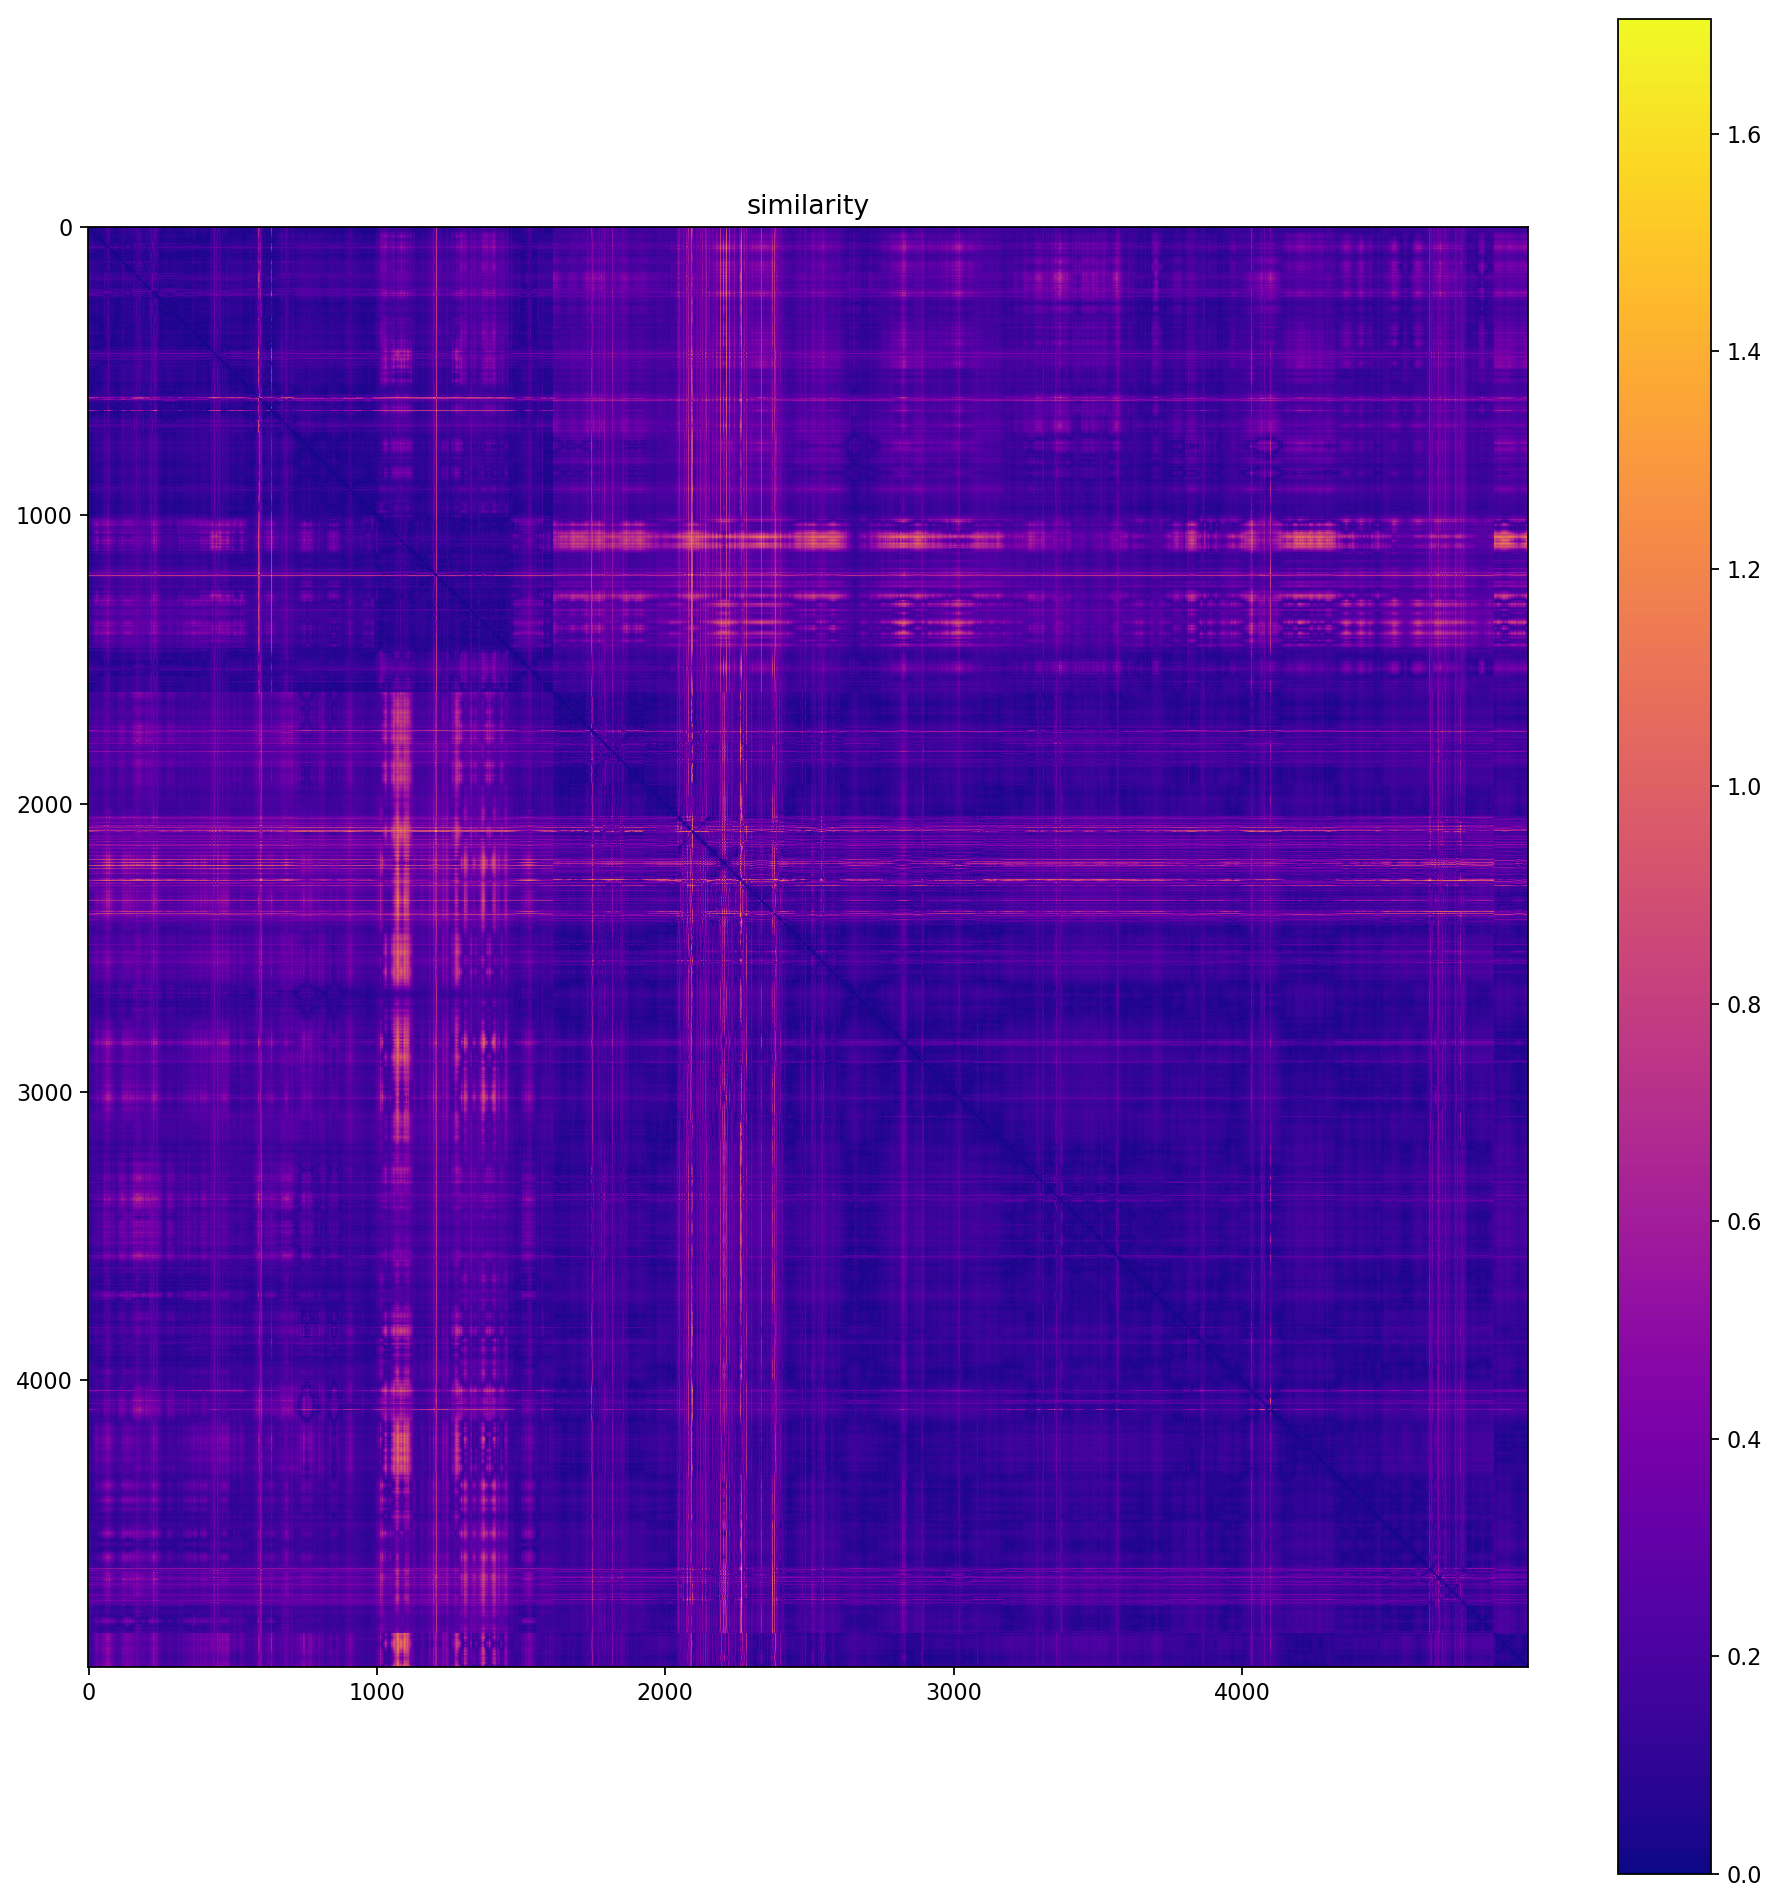

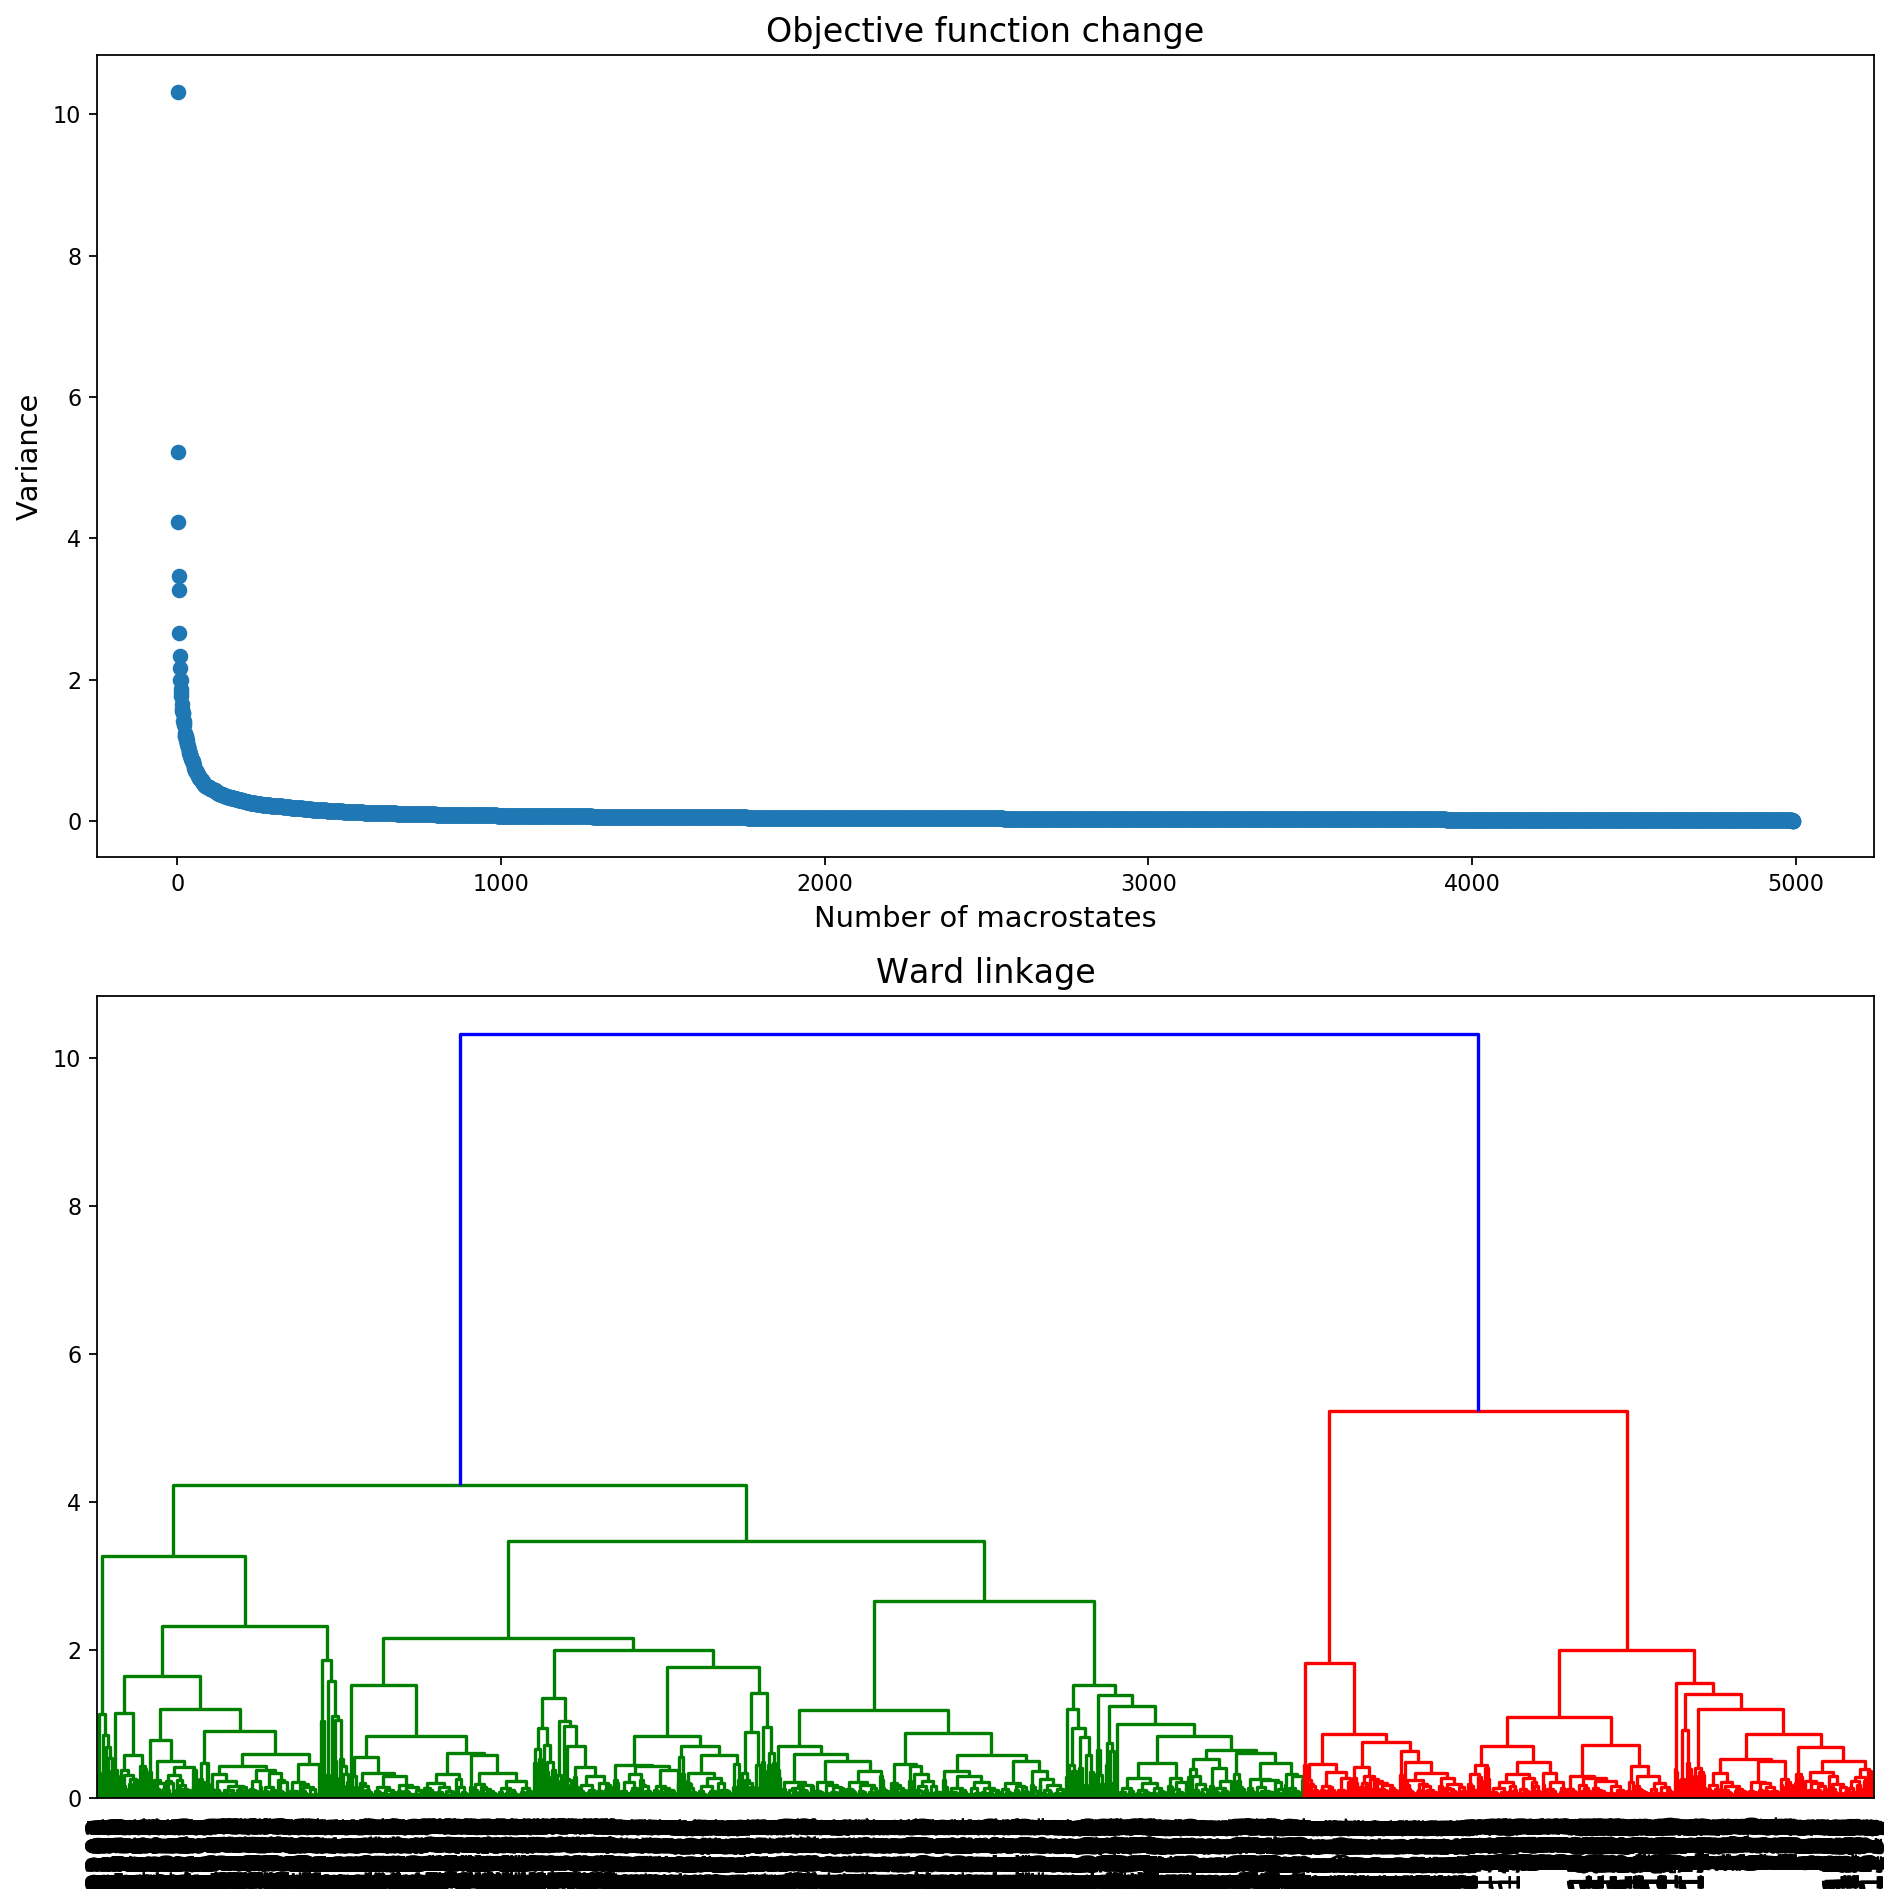

In [10]:
rbclust, rbsimil,rbassign = mechanics.rigidbodies(t,
                      pdb_output=PROJDIR+'/1pt_bank_rba/rb.pdb',
                      cluster_output=True,
                      pdb_keep_all=True,
                      pdb_filter=True)
analysis.plot_matrix(rbsimil,title='similarity',figname=PROJDIR+'/1pt_bank_rba/rb_mat')
analysis.plot_cluster(rbclust,np.arange(rbclust.shape[0]+1),figname=PROJDIR+'/1pt_bank_rba/rb')

## of a previously computed mode

In [4]:
traj = analysis.load_mode(PROJDIR+'/1pt_bank_analysis/job_oscillatory_PC1.pdb')

In [5]:
t = traj.slice(np.arange(9,12))

Number of domains:  3  ( 0.9562601057873099 )
>WRITING  ../examples/Ribosome_80S_mammal/1pt_bank_analysis/job_oscillatory_PC1_rb.pdb
>OUTPUT CLUSTER INFO


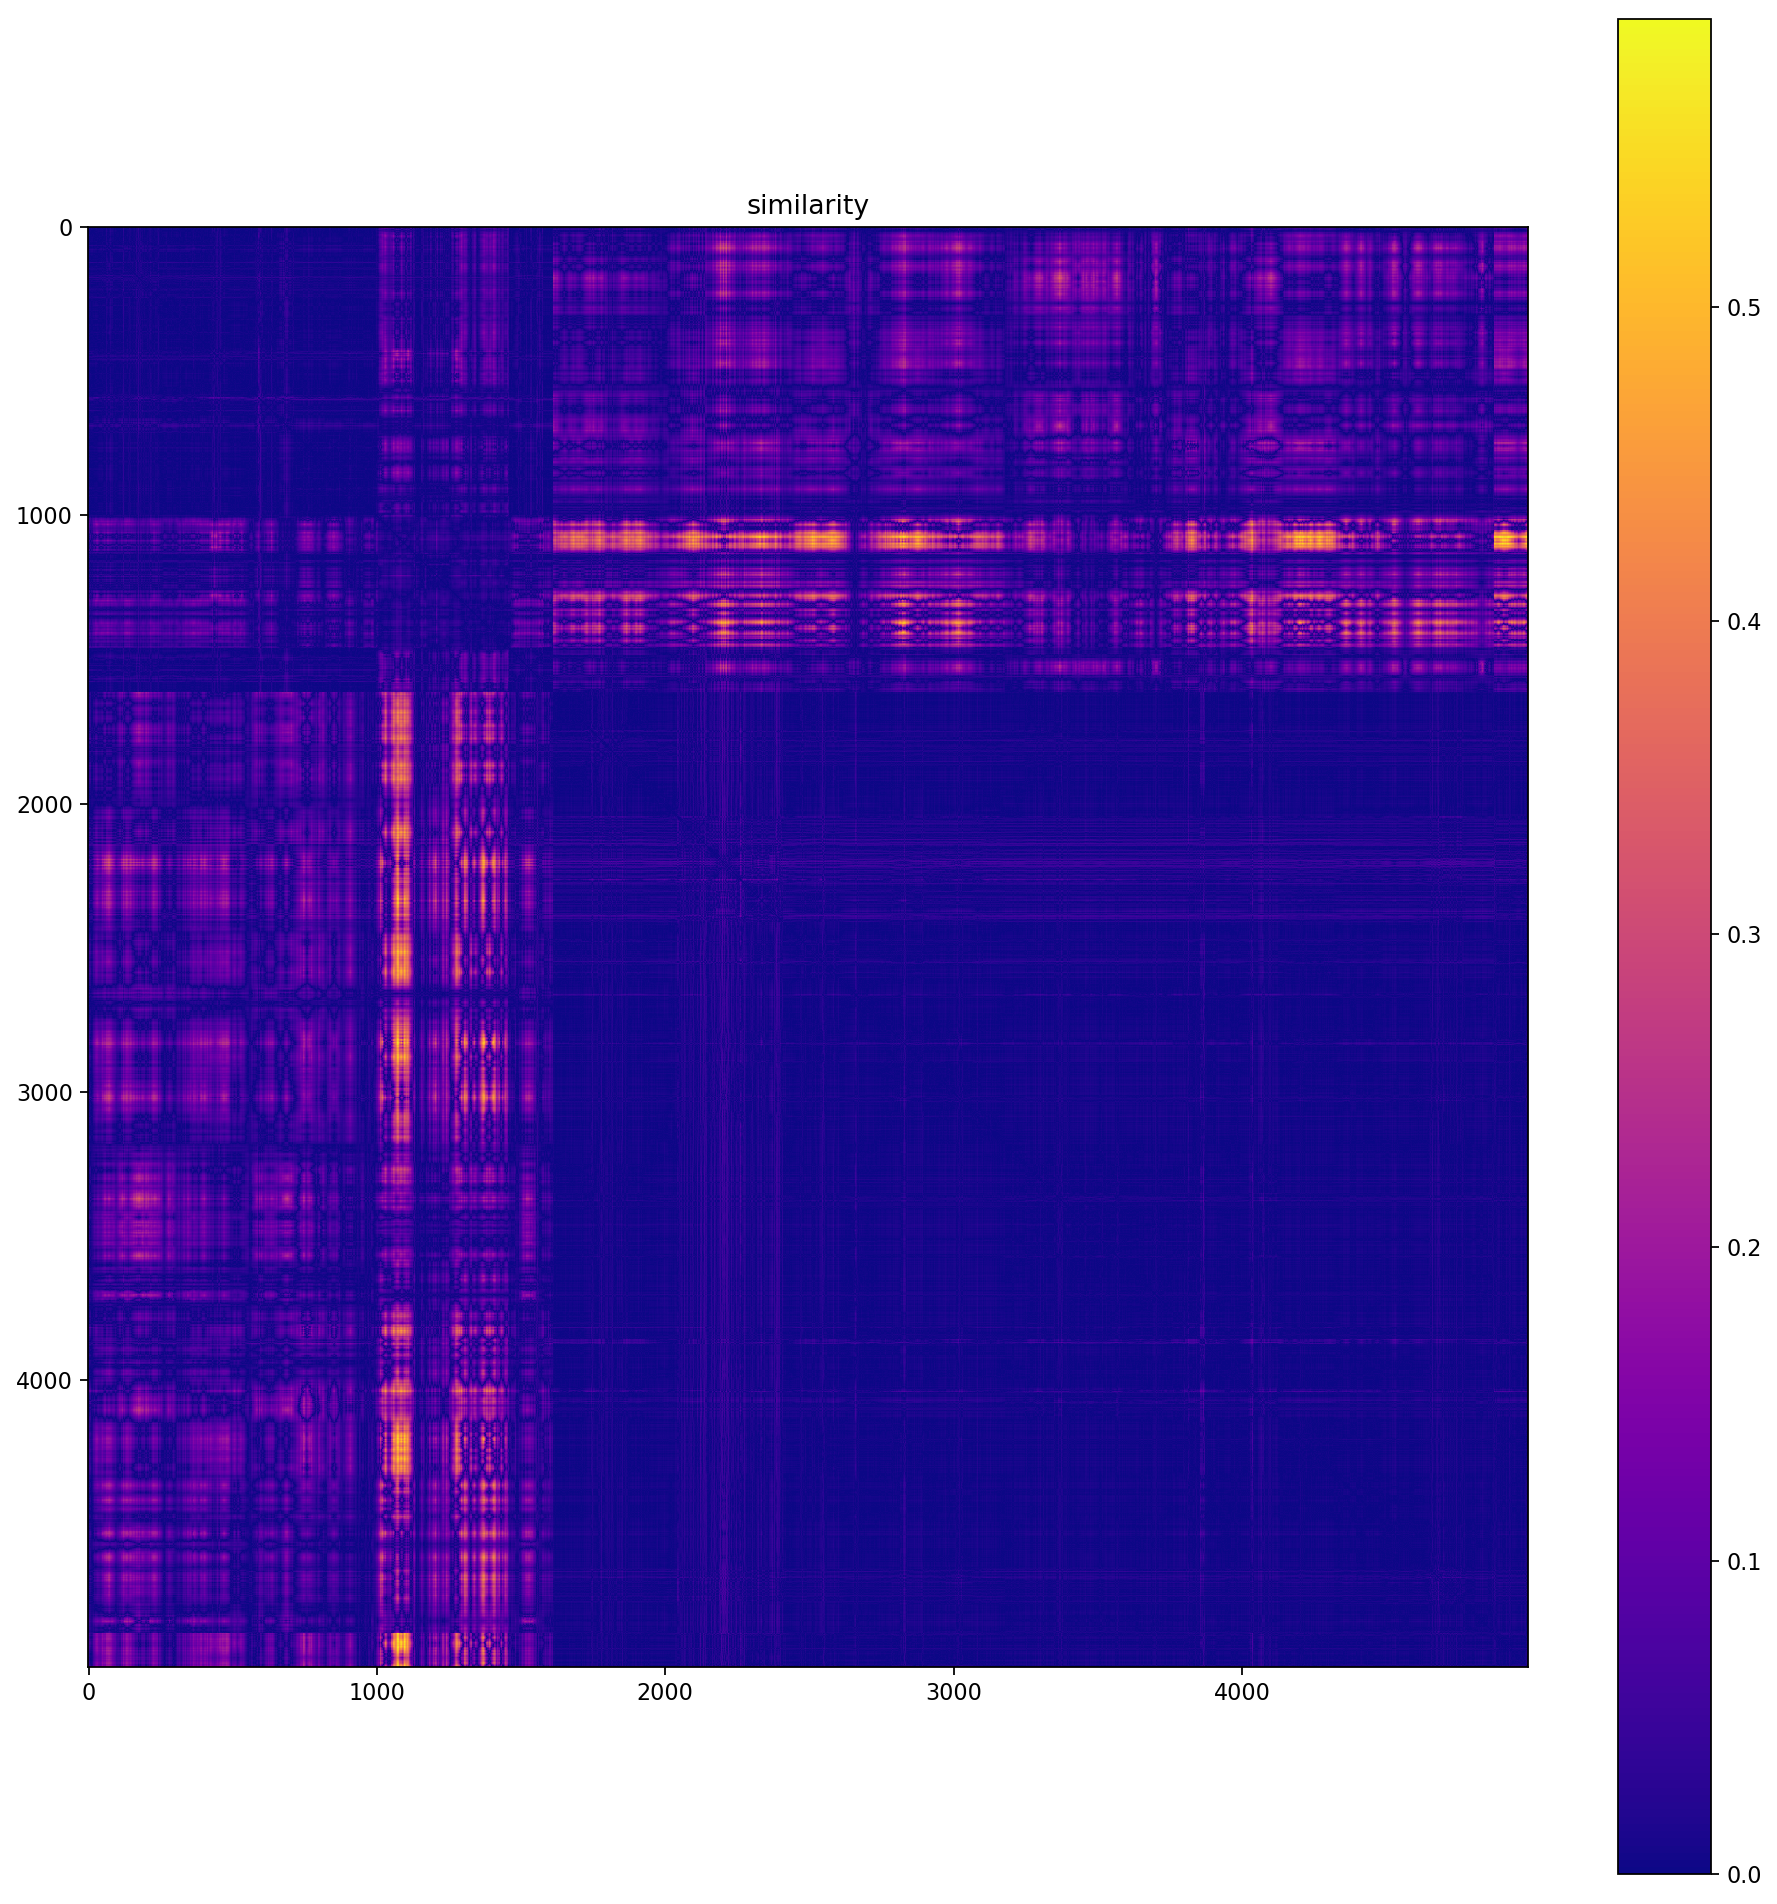

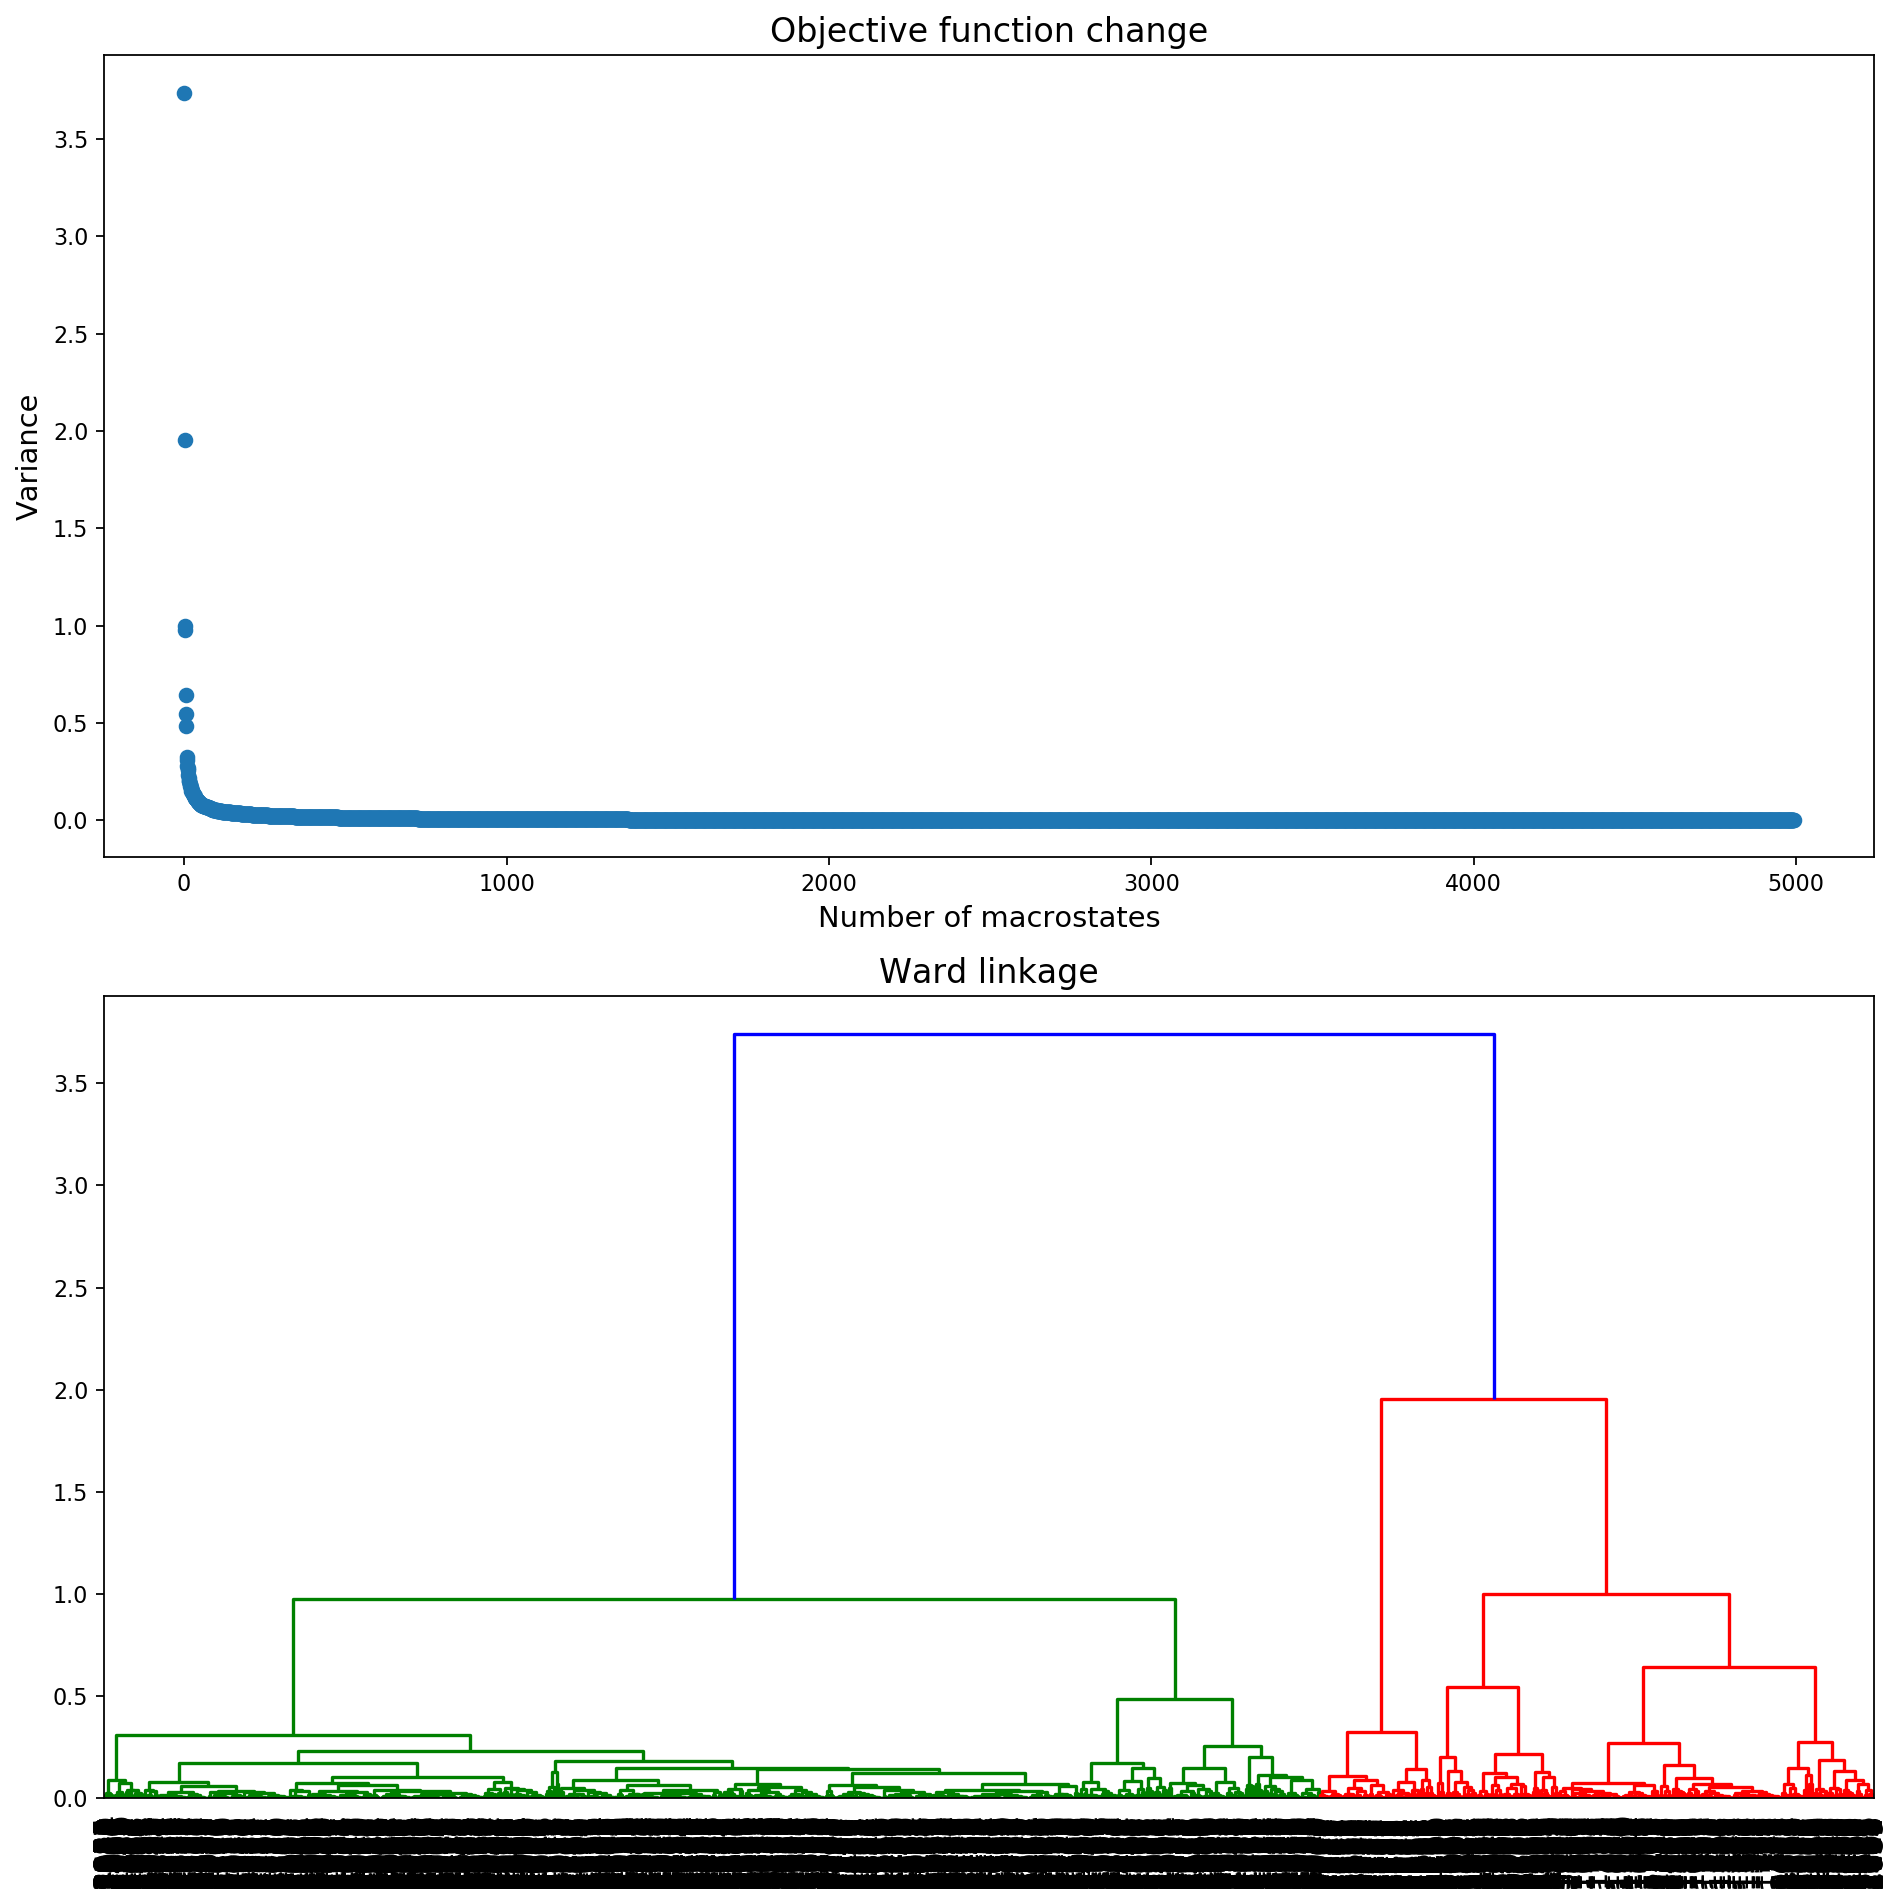

In [6]:
rbclust, rbsimil,rbassign = mechanics.rigidbodies(t,
                      pdb_output=PROJDIR+'/1pt_bank_analysis/job_oscillatory_PC1_rb.pdb',
                      cluster_output=True,
                      pdb_keep_all=True,
                      pdb_filter=True)
analysis.plot_matrix(rbsimil,
                     title='similarity',
                     figname=PROJDIR+'/1pt_bank_analysis/job_oscillatory_PC1_rb_mat')
analysis.plot_cluster(rbclust,
                      np.arange(rbclust.shape[0]+1),
                      figname=PROJDIR+'/1pt_bank_analysis/job_oscillatory_PC1_rb')